<a href="https://colab.research.google.com/github/btejas26/AI/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install scikit-survival

In [20]:
import sksurv

/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


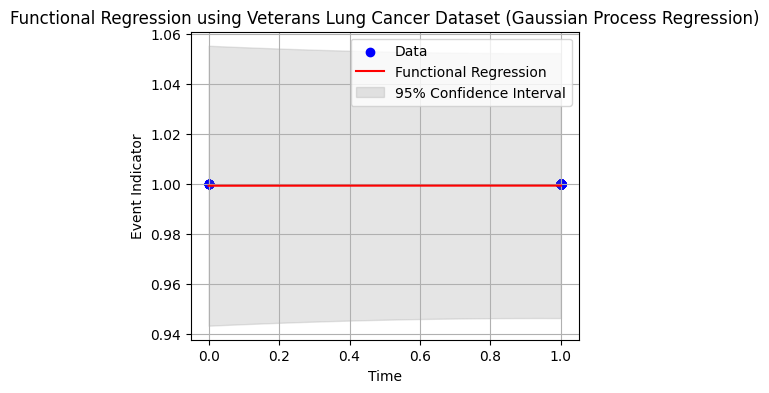

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Extract the event times from the dataset
event_times = np.array([entry[0] for entry in data_y])

# Convert the event times to a suitable format for regression
X_flat = np.array(event_times).reshape(-1, 1)

# Extract the event indicators (0 for censored, 1 for event occurred)
# We'll use this as the response variable in functional regression
y_flat = np.array([1 if entry[1] else 0 for entry in data_y])

# Fit a Gaussian Process Regression model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
regression_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
regression_model.fit(X_flat, y_flat)

# Predict on new data
new_x = np.linspace(min(X_flat), max(X_flat), 100).reshape(-1, 1)
predicted_y, _ = regression_model.predict(new_x, return_std=True)

# Visualize the functional regression model
plt.figure(figsize=(5, 4))
plt.scatter(X_flat, y_flat, color='blue', label='Data')
plt.plot(new_x, predicted_y, color='red', label='Functional Regression')
plt.fill_between(new_x.flatten(), predicted_y - 1.96 * _, predicted_y + 1.96 * _,
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Event Indicator')
plt.title('Functional Regression using Veterans Lung Cancer Dataset (Gaussian Process Regression)')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error: 35176.38565485416


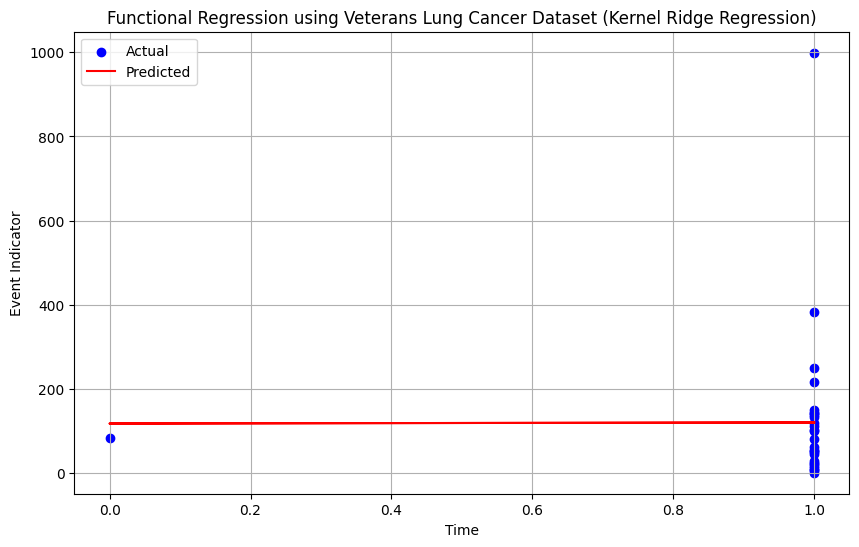

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Extract the event times and event indicators from the dataset
event_times = np.array([entry[0] for entry in data_y])
event_indicators = np.array([entry[1] for entry in data_y])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(event_times, event_indicators, test_size=0.2, random_state=42)

# Convert the event times to a suitable format for regression
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Fit Kernel Ridge Regression model
krr_model = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
krr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = krr_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the functional regression model
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Event Indicator')
plt.title('Functional Regression using Veterans Lung Cancer Dataset (Kernel Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


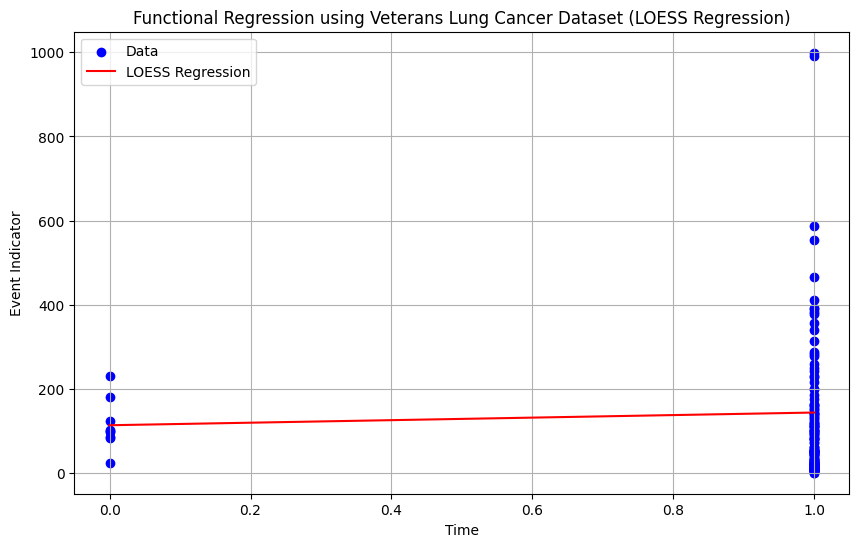

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Extract the event times and event indicators from the dataset
event_times = np.array([entry[0] for entry in data_y])
event_indicators = np.array([entry[1] for entry in data_y])

# Sort the data based on event times
sorted_indices = np.argsort(event_times)
event_times_sorted = event_times[sorted_indices]
event_indicators_sorted = event_indicators[sorted_indices]

# Perform LOESS regression
smoothed = lowess(event_indicators_sorted, event_times_sorted, frac=0.1)

# Visualize the functional regression model
plt.figure(figsize=(10, 6))
plt.scatter(event_times_sorted, event_indicators_sorted, color='blue', label='Data')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='LOESS Regression')
plt.xlabel('Time')
plt.ylabel('Event Indicator')
plt.title('Functional Regression using Veterans Lung Cancer Dataset (LOESS Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

# Load the veterans lung cancer dataset
data_x, data_y = load_veterans_lung_cancer()

# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data_x)

# Fit Cox Proportional Hazards Survival Analysis
coxph_model = CoxPHSurvivalAnalysis()
coxph_model.fit(X_encoded, data_y)

# Print the coefficients
print("Coefficients:")
for feature, coef in zip(X_encoded.columns, coxph_model.coef_):
    print(f"{feature}: {coef}")

# Check encoder categories
print("Encoder Categories:")
print(encoder.categories_)

# Plot survival curves
plt.figure(figsize=(10, 6))
for group_idx in range(len(encoder.categories_[0])):
    group_label = encoder.categories_[0][group_idx]
    mask = X_encoded[:, group_idx] == 1
    X_group = X_encoded[mask]
    survival_function = coxph_model.predict_survival_function(X_group)
    for i, s in enumerate(survival_function):
        plt.step(s.x, s.y, where="post", label=f"{group_label}, sample {i+1}")
plt.xlabel("Time")
plt.ylabel("Survival probability")
plt.title("Survival Curves for Different Groups (CoxPH Survival Analysis)")
plt.legend()
plt.grid(True)
plt.show()

Coefficients:
Age_in_years: -0.008549423607116972
Celltype=large: -0.7886715344470416
Celltype=smallcell: -0.3318126596422239
Celltype=squamous: -1.1882993132575488
Karnofsky_score: -0.03262171851944926
Months_from_Diagnosis: -9.200171731753701e-05
Prior_therapy=yes: 0.07232653674735076
Treatment=test: 0.2899358787945824
Encoder Categories:
{'Celltype': Index(['adeno', 'large', 'smallcell', 'squamous'], dtype='object'), 'Prior_therapy': Index(['no', 'yes'], dtype='object'), 'Treatment': Index(['standard', 'test'], dtype='object')}


KeyError: 0

<Figure size 1000x600 with 0 Axes>